## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import Data

In [2]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Michael's Machine Learning Practical Project\loan-test.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,1.0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,1.0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,1.0


In [4]:
df.shape

(367, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        338 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 37.4+ KB


## Handling Missing Values

In [6]:
print(df.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status          29
dtype: int64


In [7]:
df = df.dropna()

In [8]:
df = df.dropna(axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1.0
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban,1.0
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,1.0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,1.0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,1.0


In [9]:
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [10]:
df.shape

(289, 13)

## Correcting Data Types

In [11]:
df['Credit_History'] = df['Credit_History'].astype(int)
df['Loan_Status'] = df['Loan_Status'].astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    int64  
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    int64  
 10  Credit_History     289 non-null    int64  
 11  Property_Area      289 non-null    object 
 12  Loan_Status        289 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 31.6+ KB


## Convert categorical features into numerical values (using label encoding)

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360,1,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360,1,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360,1,2,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360,1,2,1
5,LP001054,1,1,0,1,1,2165,3422,152.0,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,0,0,2269,2167,99.0,360,1,1,1
362,LP002971,1,1,3,1,1,4009,1777,113.0,360,1,2,1
363,LP002975,1,1,0,0,0,4158,709,115.0,360,1,2,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360,1,0,1


## Visualization

In [15]:
df['Loan_Status'].replace(0, 'N',inplace=False) 
df['Loan_Status'].replace(1, 'Y',inplace=False)

0      Y
1      Y
2      Y
4      Y
5      Y
      ..
361    Y
362    Y
363    Y
365    Y
366    Y
Name: Loan_Status, Length: 289, dtype: object

In [17]:
df["Loan_Status"].value_counts(normalize = False).reset_index() # 1 is Y and 0 is N (Alphabetically)

,Loan_Status,count
0,1,243
1,0,46


Text(0.5, 1.0, 'Current Loan Status')

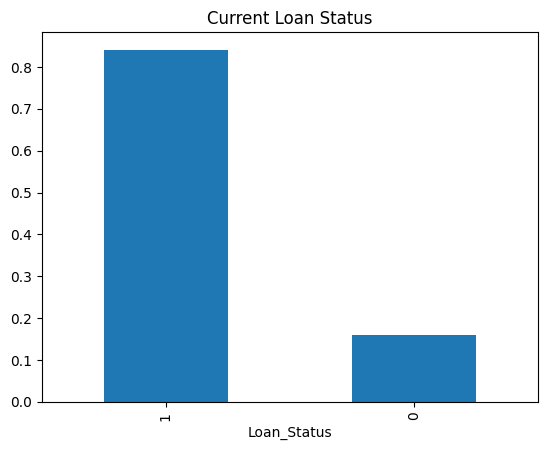

In [18]:
df['Loan_Status'].value_counts(normalize = True).plot.bar()
plt.title("Current Loan Status")

In [19]:
df["Gender"].value_counts(normalize = True).reset_index()

,Gender,proportion
0,1,0.795848
1,0,0.204152


<Axes: title={'center': 'Credit History'}, xlabel='Credit_History'>

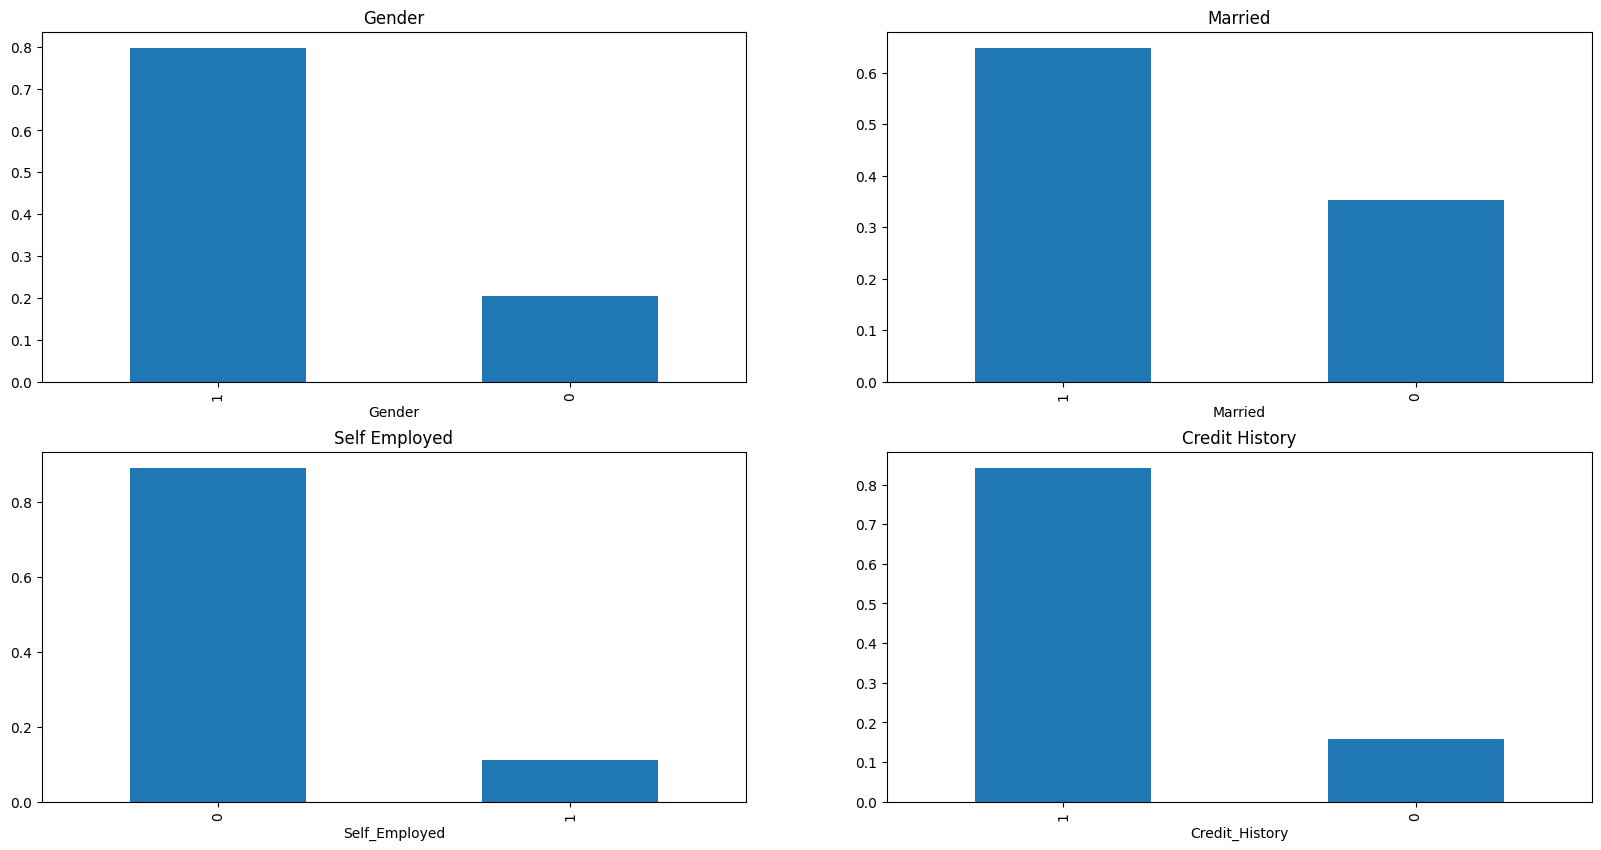

In [20]:
plt.figure(1)
plt.subplot(221) 
df['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')
plt.subplot(222)
df['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
df['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')
plt.subplot(224)
df['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')

## Insight from the plot
1. 80% applicants in the database are males.
2. 65% applicants are married
3. Around 11% of the applicants are self employed
4. Around 85% of the applicants have repaid their debts


<Axes: title={'center': 'Property area'}, xlabel='Property_Area'>

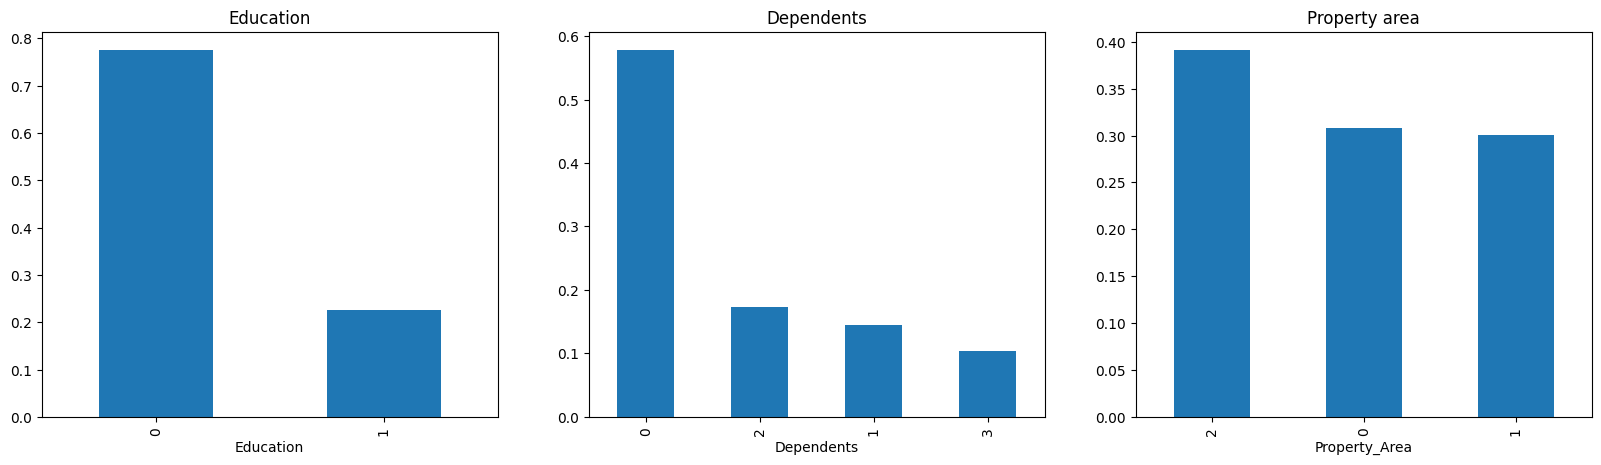

In [21]:
plt.figure(1)
plt.subplot(131)
df['Education'].value_counts(normalize = True).plot.bar(figsize = (20,5), title = 'Education')
plt.subplot(132)
df['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.subplot(133)
df['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property area')

## Following can be infered from the plots
1.Around 80% are graduated 2.Most people dont have dependents 3.Most applicants are from semi-urban area

C:\Users\user\AppData\Local\Temp\ipykernel_19064\4176103871.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


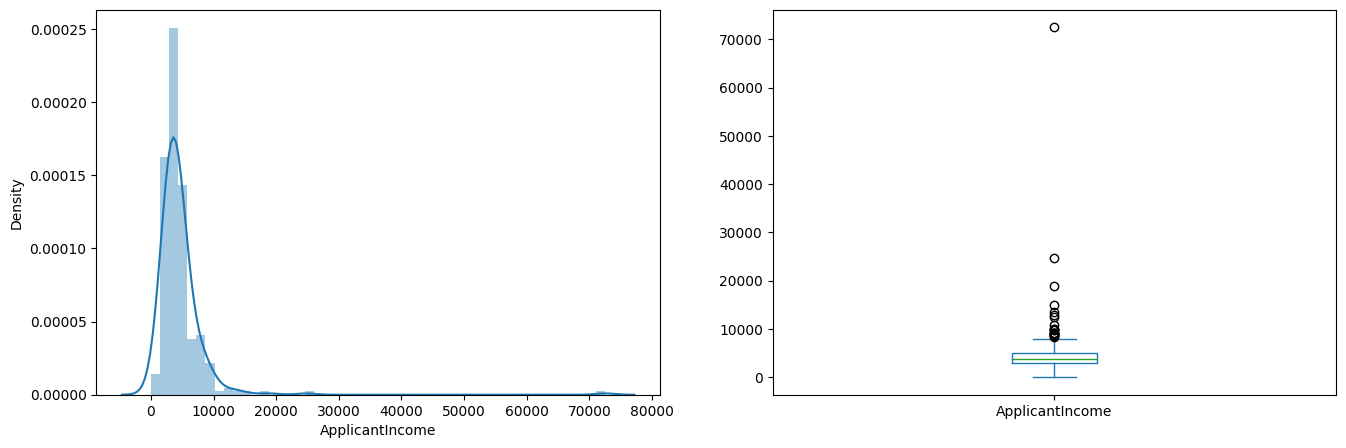

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

## It can be infered that most of the data in the distribution is inclined towards the left that means data is not normally distributed. I can try to make it normal at later stage.

The boxplot confirms presence of a number of outliers/ extreme values in the database. This can be attributed to the presence of income disparity in the society.

Lets try segregating income by level of education next

Text(0.5, 0.98, '')

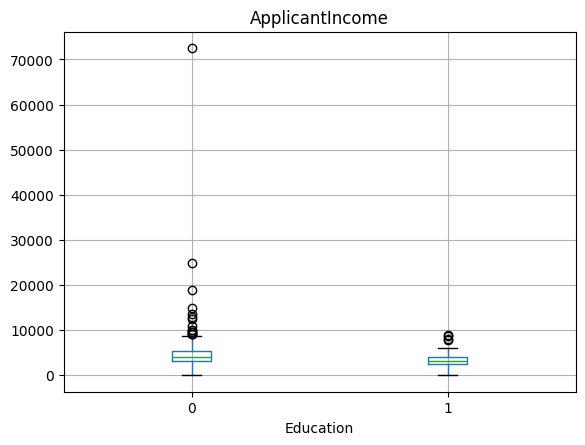

In [24]:
df.boxplot(column = 'ApplicantIncome', by = 'Education') 
plt.suptitle("")

## We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Next let’s look at the Coapplicant income distribution

C:\Users\user\AppData\Local\Temp\ipykernel_19064\2173610328.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: >

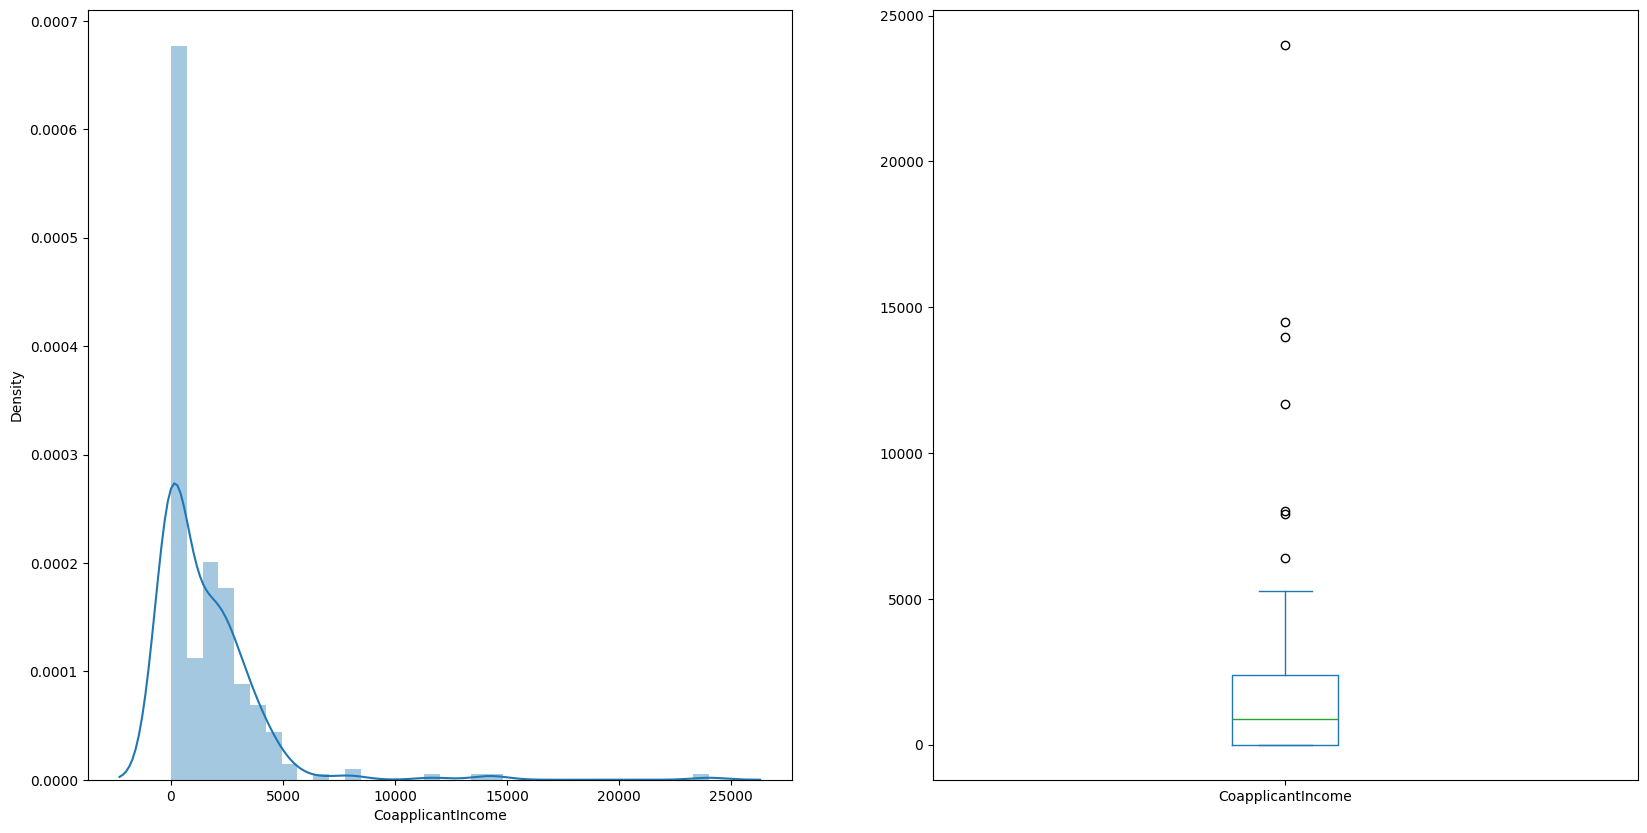

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize =(20,10))

## We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 25000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable

<Axes: xlabel='Gender'>

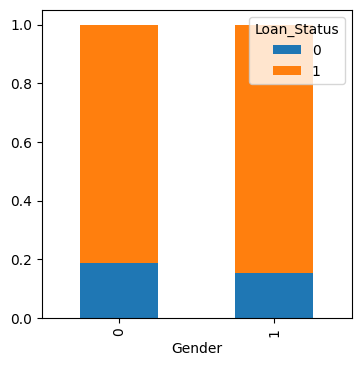

In [26]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True, figsize =(4,4))

## It can be infered that the approval of loan is not determined by gender.

Next for other variables

<Axes: xlabel='Self_Employed'>

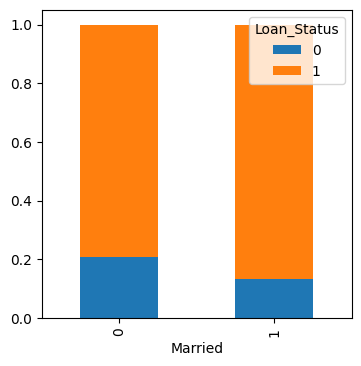

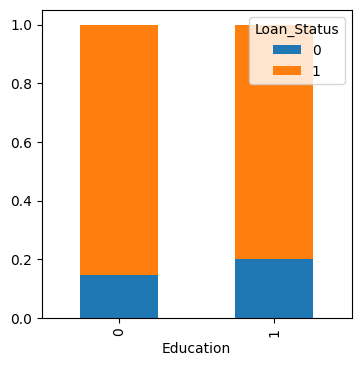

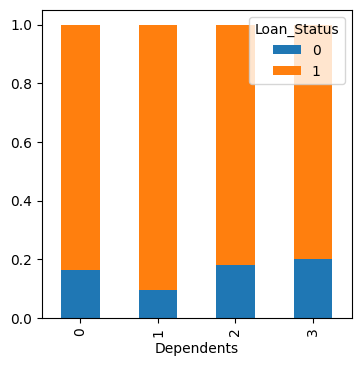

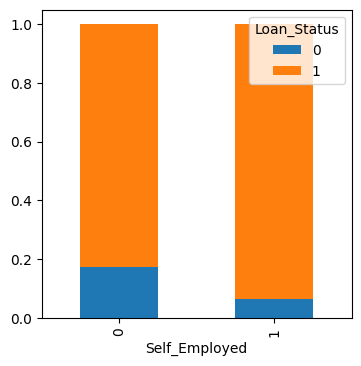

In [27]:
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Education = pd.crosstab(df['Education'],df['Loan_Status'])
Dependents = pd.crosstab(df['Dependents'],df['Loan_Status'])
Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

## Proportion of married applicants is higher for the approved loans. Distribution of applicants with 2 or 3+ dependents is similar across both the categories of Loan_Status. There is nothing significant we can infer from Self_Employed vs Loan_Status plot

In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360,1,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360,1,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360,1,2,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360,1,2,1
5,LP001054,1,1,0,1,1,2165,3422,152.0,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,0,0,2269,2167,99.0,360,1,1,1
362,LP002971,1,1,3,1,1,4009,1777,113.0,360,1,2,1
363,LP002975,1,1,0,0,0,4158,709,115.0,360,1,2,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360,1,0,1


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Features (all columns except 'Loan_Status')
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)

# Target variable
y = df['Loan_Status']

In [31]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (231, 11) (231,)
Testing set size: (58, 11) (58,)


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [34]:
# Standardize numerical features
scaler = StandardScaler()
X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(
    X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.transform(
    X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [35]:
# Initialize the Linear Regression model
our_model =LogisticRegression()
our_model.fit(X_train, y_train)

LogisticRegression()

## Evaluate the model performance

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X = df.drop('Loan_Status', axis=1)  # Features (excluding the target)
y = df['Loan_Status']  # Target variable

# Convert categorical features to numeric if needed
X = pd.get_dummies(X)  # Example: One-hot encode categorical features

# Encode target variable (if it's categorical)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [39]:
x = df.iloc[:,0].values.reshape(-1,1)
y= df.iloc[:,-1].values

In [40]:
x[3:10]

array([['LP001051'],
       ['LP001054'],
       ['LP001055'],
       ['LP001056'],
       ['LP001067'],
       ['LP001078'],
       ['LP001096']], dtype=object)

In [41]:
x[:5]

array([['LP001015'],
       ['LP001022'],
       ['LP001031'],
       ['LP001051'],
       ['LP001054']], dtype=object)

In [48]:
y[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [49]:
df['Loan_Status'].replace(0, 'N',inplace=False) 
df['Loan_Status'].replace(1, 'Y',inplace=False)

0      Y
1      Y
2      Y
4      Y
5      Y
      ..
361    Y
362    Y
363    Y
365    Y
366    Y
Name: Loan_Status, Length: 289, dtype: object

In [50]:
y[:5]

array([1, 1, 1, 1, 1])

In [51]:
df.to_csv('ML Cleaned DF .csv', index = False)